<a href="https://colab.research.google.com/github/kdhaw6/Retail-Sales-Analysis---Regression-Project/blob/main/Kunal_Dhawan_Project_Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project : Retail Sales Prediction - The Task is to forecast the sales.

**Problem Statement**

Rossman perates over 3000 drug stores in 7 European Countries. Currently, store managers are tasked to predicting there daily sales for upto six weeks in advance. Store sales are infulenced by many factors including promotions, competetion, school and state holidays, seosanilty and locailty.  With thousands of individual manages predicitng sales based on thier unique circumstances, the accuracy of the results can be quite varied. 

**Business Goal**

We have historical data of 1115 Rossman stores and out task is to forecast the sales.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the dataset
sales_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Rossmann Stores Data.csv')
store_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/store.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


First look of the dataset

In [4]:
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [7]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


There are Null Values in the store data set, and no null values in the sales data set

### <b>DataSet Information:</b>

1. Id: id of store and a date(Interger)
2. Store - a unique Id for each store
3. Sales: Amount of Sales Dependent Variable (Numerical)
4. Customers: No. of Customers  (Numerical)
5. Open: Store open or closed (Categorical)
6. State Holiday: State Holiday or not (Categorical)
7. School Holiday: School Holiday or not (Categorical)
8. DayOfWeek: Day of the week (Categorical)
9. Store type - different types of stores: a,b,c,d (Categorical)
10. Assortment - Different types : a,b,c (Categorical)
11. CompetitionDistance - distance to the nearest competitor store (Numerical)
12. CompetitionOpenSince[Month/Year] - gives time of the competitor when it was opened (Month/ Year)
13. Promo - a store is running a promo on that day (Categorical)
14. Promo2 - Store running consecutive promotion or not (Categorical)
15. Date: Date of Sales (Date)




In [8]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Handling Missing Values

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Competition Distance Distribution Plot')

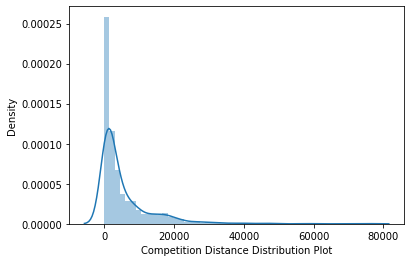

In [9]:
#distribution plot of competition distance
sns.distplot(x=store_df['CompetitionDistance'], hist = True)
plt.xlabel('Competition Distance Distribution Plot')

It seems like most of the values of the CompetitionDistance are towards the left and the distribution is skewed on the right. Median is more robust to outlier effect.



In [10]:
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace= True)

CompetitionOpenSinceMonth- gives the approximate month of the time the nearest competitor was opened, mode of the column would tell us the most occuring month

CompetitionOpenSinceYear- gives the approximate year of the time the nearest competitor was opened, mode of the column would tell us the most occuring month

In [11]:
store_df['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
store_df['CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceYear'].mode()[0], inplace = True)

Promo2SinceWeek, Promo2SinceYear and PromoInterval are NaN wherever Promo2 is 0 or False as can be seen in the first look of the dataset. They can be replaced with 0

In [12]:
store_df['Promo2SinceWeek'].fillna(value=0,inplace=True)
store_df['Promo2SinceYear'].fillna(value=0,inplace=True)
store_df['PromoInterval'].fillna(value=0,inplace=True)

In [13]:
store_df.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Merging Both the data sets

In [14]:
dataset = sales_df.merge(right=store_df, on="Store", how="left")

In [15]:
dataset.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [16]:
# duplicate
len(dataset[dataset.duplicated()])

0

In [17]:
dataset.isnull().sum().sum()

0

Checking for Duplicates - there are no duplicates

# **Exploratory Data Analysis**

Converting and Splitting Date

Extracting from date

In [18]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [19]:
dataset['Year'] = dataset['Date'].dt.year
dataset['Month'] = dataset['Date'].dt.month
dataset['WeekOfYear'] = dataset['Date'].dt.isocalendar().week
dataset['DayOfYear'] = dataset['Date'].dt.dayofyear
years = dataset['Year'].unique()




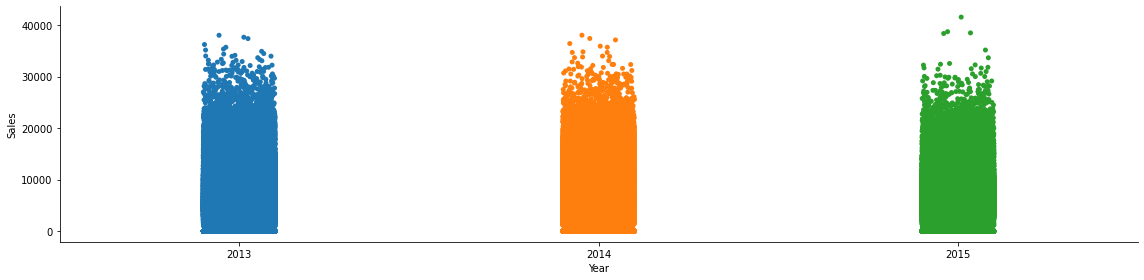

In [20]:
sns.catplot(x='Year',y='Sales',data=dataset, height=4, aspect=4 );

We can see that there is not such significant differences in these 3 years in terms of sales

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


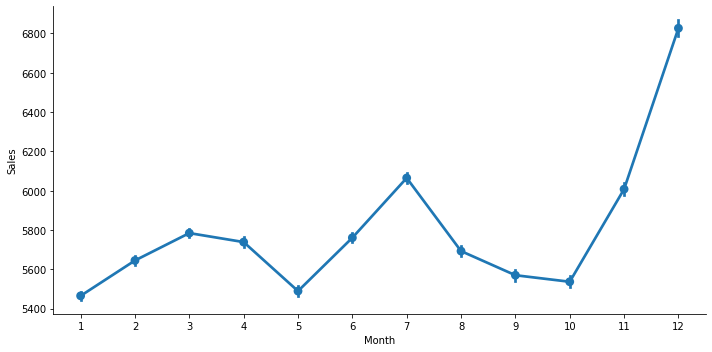

In [21]:
sns.factorplot(x="Month" ,y = "Sales" , data=dataset, kind="point", aspect=2,size=5)

As We can see that In the month of November and Specially in December Sales is increasing Rapidly every year in the festival season.


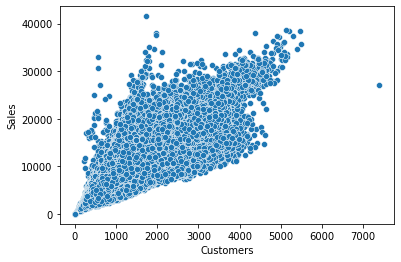

In [22]:
sns.scatterplot(x=dataset['Customers'], y=dataset['Sales'])

Sales and Customer scatter plot shows a direct positive relation between them with a few outliers.

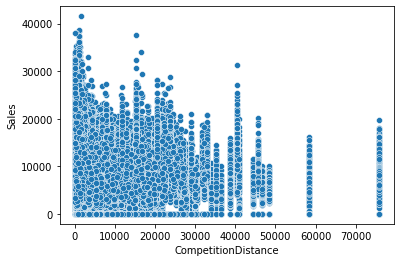

In [23]:
sns.scatterplot(x=dataset['CompetitionDistance'], y=dataset['Sales'])

From the above scatter plot it can be observed that mostly the competitor stores weren't that far from each other and the stores densely located near each other saw more sales.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


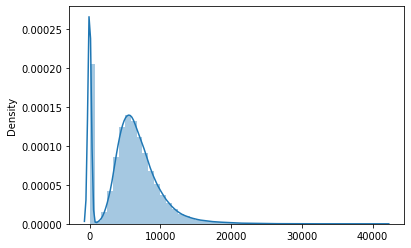

In [24]:
#distribution plot of Sales, as expected positively skewed
sns.distplot(x=dataset['Sales'])

0 indicates the no sales due to store closed. Our data for sales is rightly skewed

**Analysis of Categorical Variables**

In [25]:
categorical_features = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment',
                         'CompetitionOpenSinceMonth','Promo2','Promo2SinceYear','PromoInterval']

In [26]:
categorical_features

['DayOfWeek',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionOpenSinceMonth',
 'Promo2',
 'Promo2SinceYear',
 'PromoInterval']

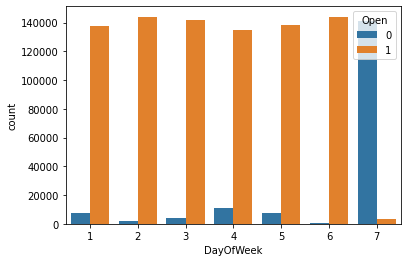

In [27]:
sns.countplot(x='DayOfWeek',hue='Open',data=dataset)

Shops have generally remained closed on Sunday

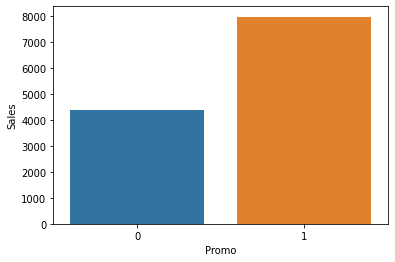

In [28]:
Promo_sales = pd.DataFrame(dataset.groupby('Promo').agg({'Sales':'mean'}))
sns.barplot(x=Promo_sales.index, y = Promo_sales['Sales'])

Sales Are nearly doubled High When Promo is Running



In [29]:
dataset['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [30]:
dataset['StateHoliday'].replace({'0':0}, inplace=True)

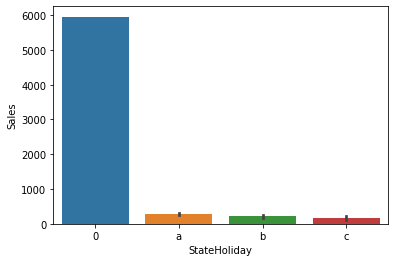

In [31]:
sns.barplot(x= 'StateHoliday', y='Sales', data = dataset)

Normally all stores, with few exceptions, are closed on state holidays. Hence less sales on holidays and more sales on non holidays

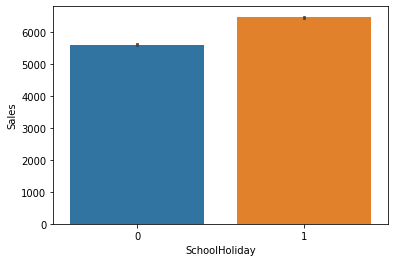

In [32]:
sns.barplot(x= 'SchoolHoliday', y='Sales', data = dataset)

More sales on school holidays

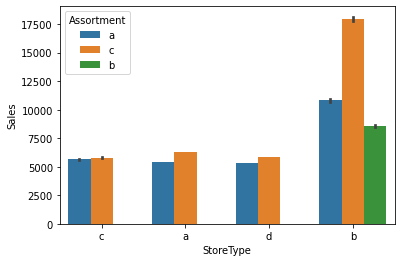

In [33]:
sns.barplot(x=dataset["StoreType"],y=dataset['Sales'],hue=dataset["Assortment"])

The above bar plot shows that the store types a, c and d have only assortment level a and c. On the other hand the store type b has all the three kinds of assortment strategies, a reason why average sales were high for store type b stores.

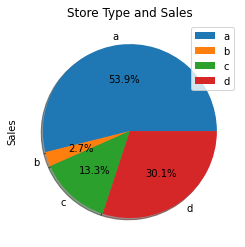

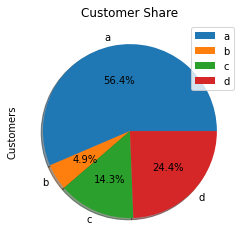

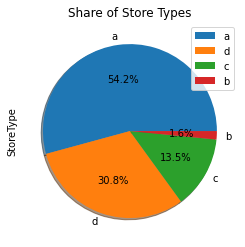

In [34]:
#let's explore store type a bit and it's influence on sales
dataset.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#customers and store type
dataset.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#store types in all of the dataset
dataset["StoreType"].value_counts().plot.pie(title='Share of Store Types', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

Earlier it was seen that the store type b had the highest sales on an average because the default estimation function to the barplot is mean.
But upon further exploration it can be clearly observed that the highest sales belonged to the store type a due to the high number of type a stores in our dataset. Store type a and c had a similar kind of sales and customer share.
Interesting insight to note is that store type b with highest average sales and per store revenue generation looks healthy and a reason for that would be all three kinds of assortment strategies involved which was seen earlier.

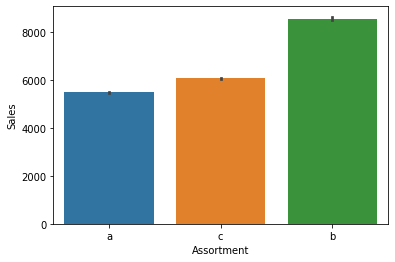

In [ ]:
sns.barplot(x='Assortment', y='Sales', data = dataset)

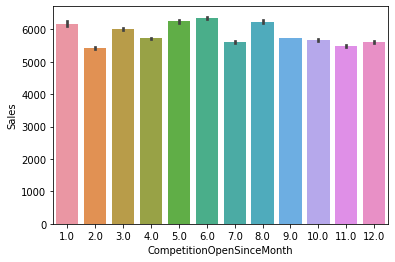

In [ ]:
sns.barplot(x='CompetitionOpenSinceMonth', y='Sales', data = dataset)

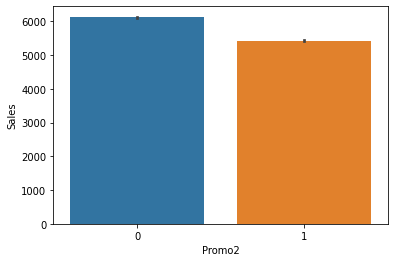

In [ ]:
sns.barplot(x='Promo2', y='Sales', data = dataset)

With Promo2, slightly more sales were seen without it which indicates there are many stores not participating in promo.

**Correlation Matrix**

By checking the correlation the factors affecting sales can be figured out.

In [35]:
#we need only meaningful numeric columns here, let's drop the unnecessary to get a clear picture
columns_to_drop = ['Store', 'Year', 'WeekOfYear', 'DayOfYear']
corr_df = dataset.drop(columns = columns_to_drop, axis =1)
corr_df['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

In [36]:
corr_df.columns

Index(['DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Month'],
      dtype='object')

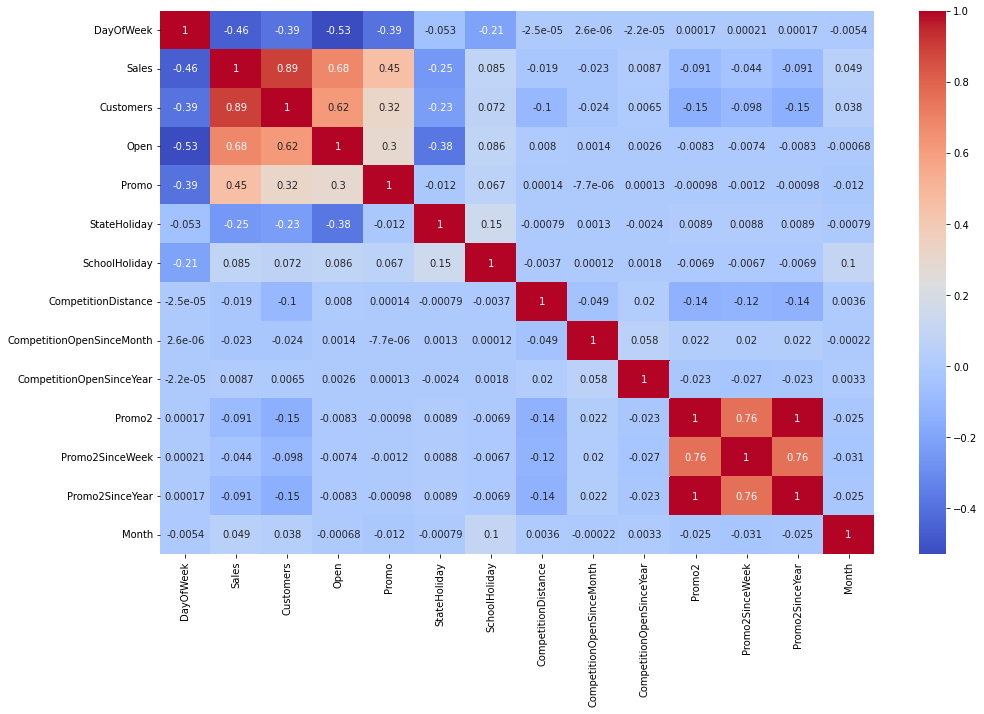

In [37]:
#correlation heatmap
plt.figure(figsize=(16,10))
sns.heatmap(corr_df.corr(), cmap="coolwarm", annot=True)

Observation:
1. Day of the week has a negative correlation indicating low sales as the weekends, and promo, customers and open has positive correlation.
2. State Holiday has a negative correlation suggesting that stores are mostly closed on state holidays indicating low sales.
3. CompetitionDistance showing negative correlation suggests that as the distance increases sales reduce, which was also observed through the scatterplot earlier.
4. There's multicollinearity involved in the dataset as well. The features telling the same story like Promo2, Promo2 since week and year are showing multicollinearity.
5. The correlation matrix is agreeing with all the observations done earlier while exploring through barplots and scatterplots.